# **Capstone Project 3: Machine Learning**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Exploration 
import missingno as msno
import klib
from sklearn.impute import SimpleImputer 

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Library
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier, StackingClassifier

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensamble 
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Bagging 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# WARNING PYTHON:
import warnings
warnings.filterwarnings("ignore")

## **Travel Insurance**

## **Context**

Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policy holder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

## **Business Problem**

Insurance Company wanted to know the prediction of possible customers that made Insurence Claim for Travel Insurance. Therefore, they hired Data manpower for creating Machine Learning and used Machine Learning to made a prediction of of Travel Insurance Claim. 

For example, If customers purchase a **basic travel insurance policy** that includes trip cancellation coverage, you can expect to pay between 5% and 10% of your trip costs. For instance, if you buy a **$10,000, nine-day trip** through the Greek Isles, you can expect to pay **between $500 and $1,000**. Let's just say Customer will get maximum amount paid $1,000. The passage also mentions that adding **"Cancel for Any Reason"** coverage to your policy can increase the cost by an **additional 40% to 60%**. This type of coverage allows you to cancel your trip for any reason and receive a refund for most of your prepaid, non-refundable expenses.

We can make an assumption that for **1 Person** took **Basic Travel Insurance** with Maximum amount to be paid for taking Insurance Policy is **$1,000** as deposit amount with **"Cancel for Any Reason"** at rate of **additional cost of 40%** The Total Amount is :

- 1,000 + 40% = 1,000 + 400 = **$1,400** 

- Let's say that if the Costumers asked for Claim with **"Cancel for Any Reason"** means Company must give the Policy Amount with Deposit and Additional Cost at **$ 1,400** 
- If the Customer is Not Claim (**Without "Cancel for Any Reason"**) means Company must give the Policy Amount **Only** for the Insurance **Coverage without Deposit** at **$ 400** 

<br>

**1. False Negative**

When Customer Predicted Not Claim but in actual is Claimed with **"Cancel for Any Reason"**. In this case insurance company will need to provide the amount of insurance policy according to travel package assigned by customer. Company must pay the Policy Amount the Costumers Claim with Deposit and Additional Cost at **$ 1,400** 


**2. False Positive**

Where Customer Predicted Claim but actually Not Claim, **Without "Cancel for Any Reason"**. In this case insurance company will need to provide the amount of insurance policy according to travel package assigned by customer. Company must give the Policy Amount only for the Insurance Coverage without Deposit at **$ 400** 

<br>

Reference:
https://www.forbes.com/advisor/travel-insurance/trip-cancellation/ 


## **Features**

-	**Agency**: Name of agency.
-	**Agency Type**: Type of travel insurance agencies.
-	**Distribution Channel**: Channel of travel insurance agencies.
-	**Product Name**: Name of the travel insurance products.
-	**Gender**: Gender of insured.
-	**Duration**: Duration of travel.
-	**Destination**: Destination of travel.
-	**Net Sales**: Amount of sales of travel insurance policies.
-	**Commission (in value)**: Commission received for travel insurance agency.
-	**Age**: Age of insured.
-	**Claim**: Claim status.


## **Load Dataset**

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


- In this Dataset, We know that we have **44328 rows** and **11 columns**.
- In **1 Row** we can conclude that consists based on 1 Person data Travel Plan; 
    - What package does he takes, from where the insurance he takes, and where he wanna go (destination)

## **Data Exploration**

Let's explore the data further by identifying what's the data consist of, missing values, duplicated, outliers, etc with domain knowledge approach.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


Since our target is **'Claim'** and the type of values in it is an object represent with **'Yes' and 'No'**, let's change it into **0 and 1**. 

In [4]:
df['Claim'] = np.where(df['Claim']== 'Yes', 1, 0)
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,0


In [5]:
# Checking Target
print(df['Claim'].value_counts())
print()
print(df['Claim'].value_counts()/len(df['Claim'])*100)

Claim
0    43651
1      677
Name: count, dtype: int64

Claim
0    98.472749
1     1.527251
Name: count, dtype: float64


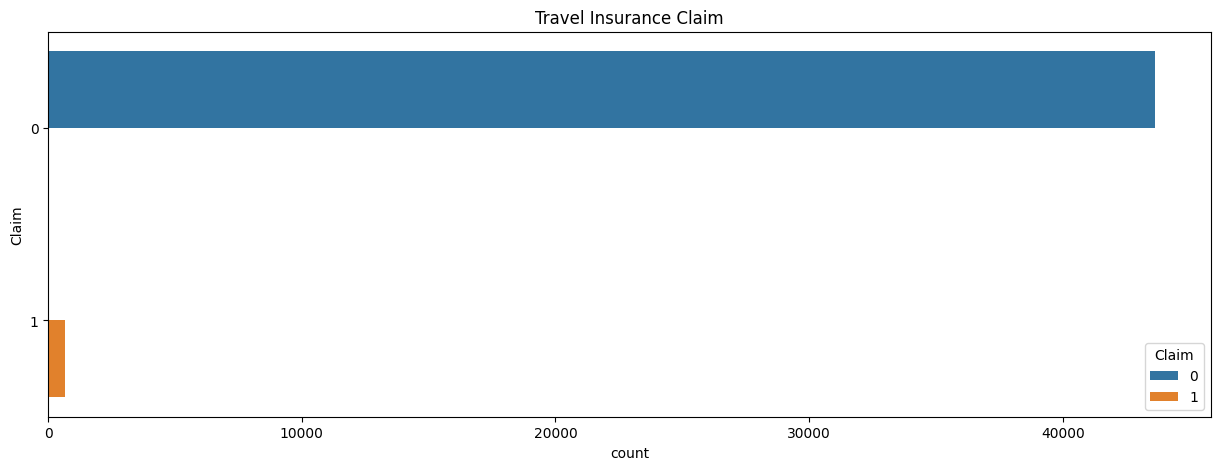

In [6]:
plt.figure(figsize=(15, 5))
sns.countplot(y='Claim', hue='Claim', data=df)
plt.title('Travel Insurance Claim');

#### From this, we can see that there's an **Extreme Imbalance Data**. With **98.47%** of **Not Claim (0)** and **1.52%** of **Claim (1)** data.

Let's continue with missing values and outliers.

In [7]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
M    6504
F    6177
Name: count, dtype: int64

Since all the missing values are in the **'Gender'** columns. Before we drop anything, let's visualize it.

<Axes: >

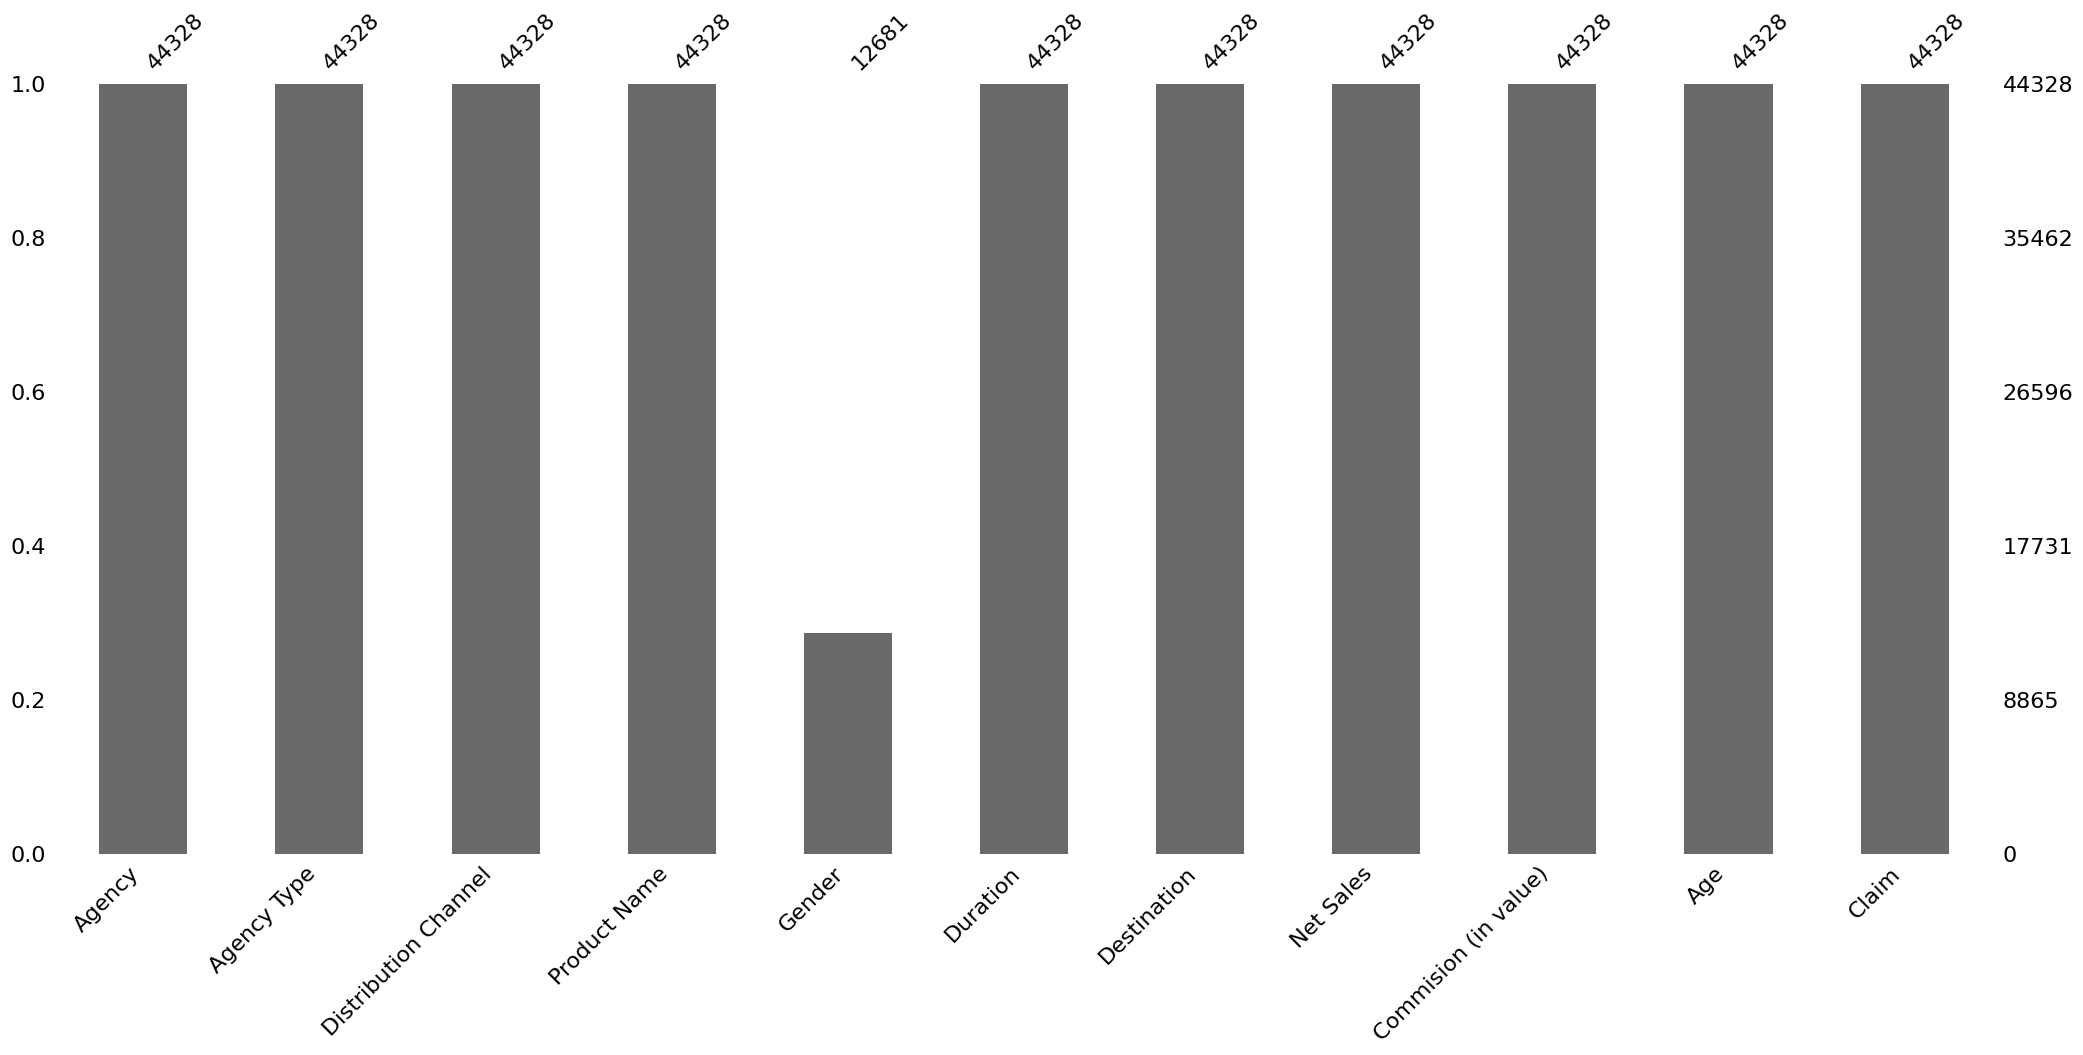

In [9]:
msno.bar(df)

Based on visualization and info, we knew that **'Gender'** column consist of **31.647 Missing Values** and **12.681 Exsisted Data**.

In [10]:
df = df.drop(columns='Gender')
df 

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


Let's see the duplicated data and drop it.

In [11]:
df.duplicated().sum()

5004

In [12]:
df = df.drop_duplicates()
df.shape

(39324, 10)

The dataset turned into **39.324** total data and **10** columns.

Let's see the unique and count of unique in this column.

In [13]:
pd.set_option('display.max_colwidth', None) 

def unique_df(df):
    df_unique = pd.DataFrame(columns=["Columns", "Nunique", "Unique"])
    df_unique["Columns"] = df.columns
    df_unique["Nunique"] = [df[col].nunique() for col in df.columns]
    df_unique["Unique"] = [df[col].unique() for col in df.columns]
    return df_unique

unique_df(df)

,Columns,Nunique,Unique
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
5,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
6,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
7,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
8,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76, 74, 66, 63, 55, 21, 60, 75, 24, 62, 73, 64, 

Let's take a look further at numerical data.

In [14]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,39324.000000,39324.00000,39324.000000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054,0.017114
std,113.404932,49.70403,20.345275,13.225494,0.129699
min,-1.000000,-357.50000,0.000000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000,0.000000
50%,25.000000,29.00000,0.000000,36.000000,0.000000
75%,57.000000,50.00000,11.880000,44.000000,0.000000
max,4881.000000,810.00000,283.500000,118.000000,1.000000


Now, let's see the data distributions of numerical data.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
No columns with numeric data were detected.


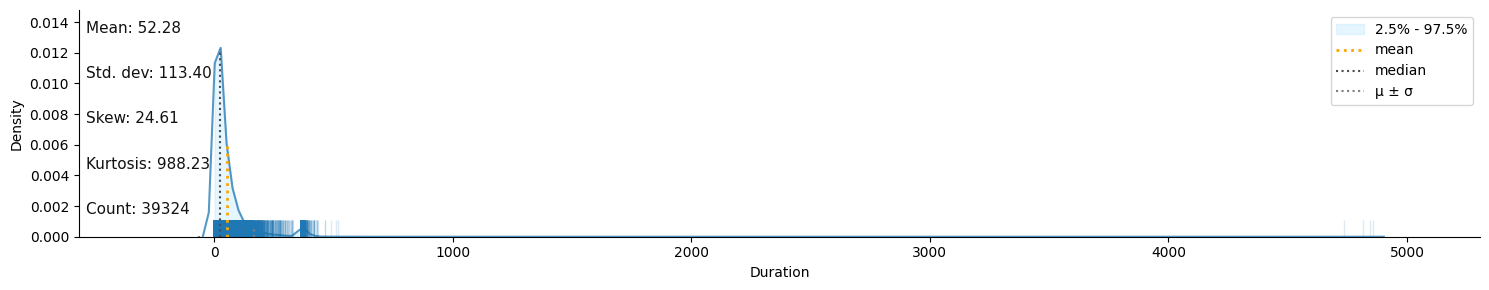

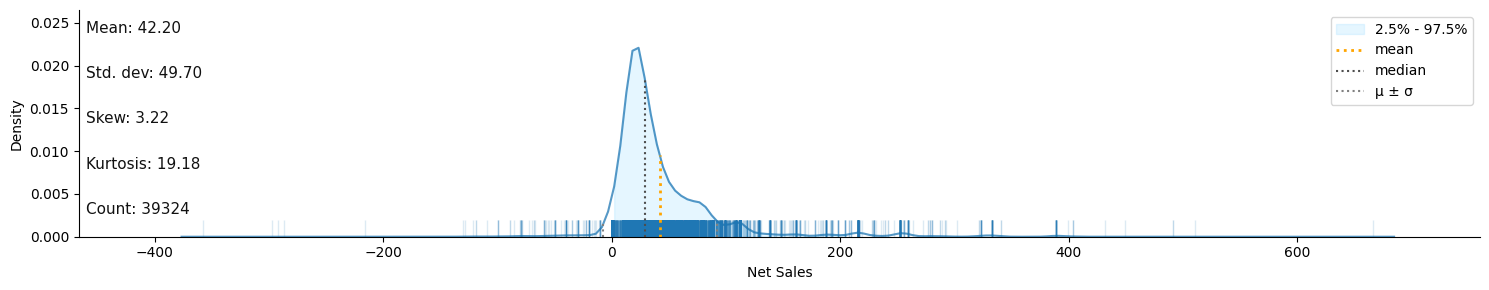

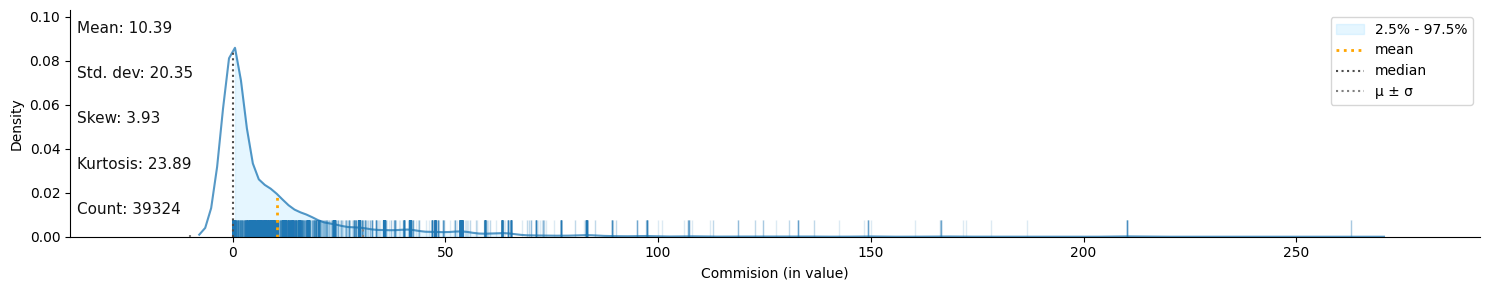

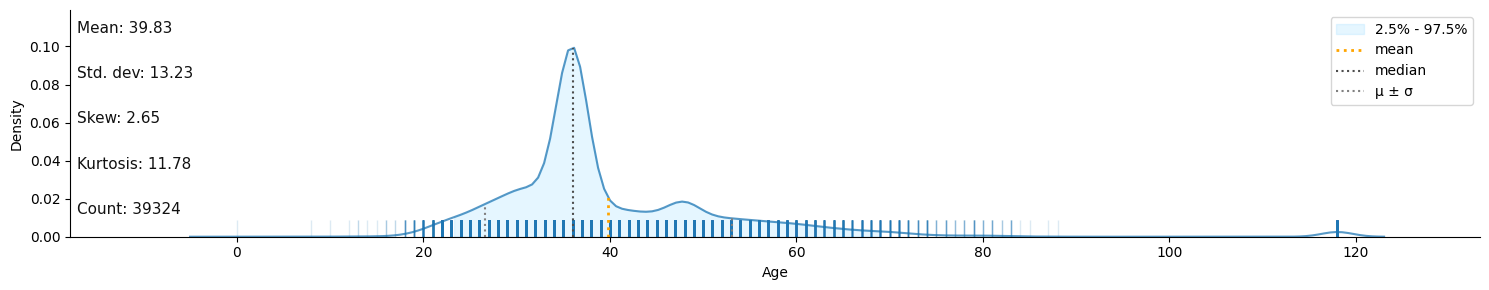

In [15]:
for col in df.describe(exclude='object').columns:
    klib.dist_plot(df[col]);

Based on this visualization data, the numerical columns distributions are mostly not normally distributed or **Right Skewed.**

Lets see if there's any outliers in the numerical data.

In [16]:
df.describe(exclude='object').columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim'], dtype='object')

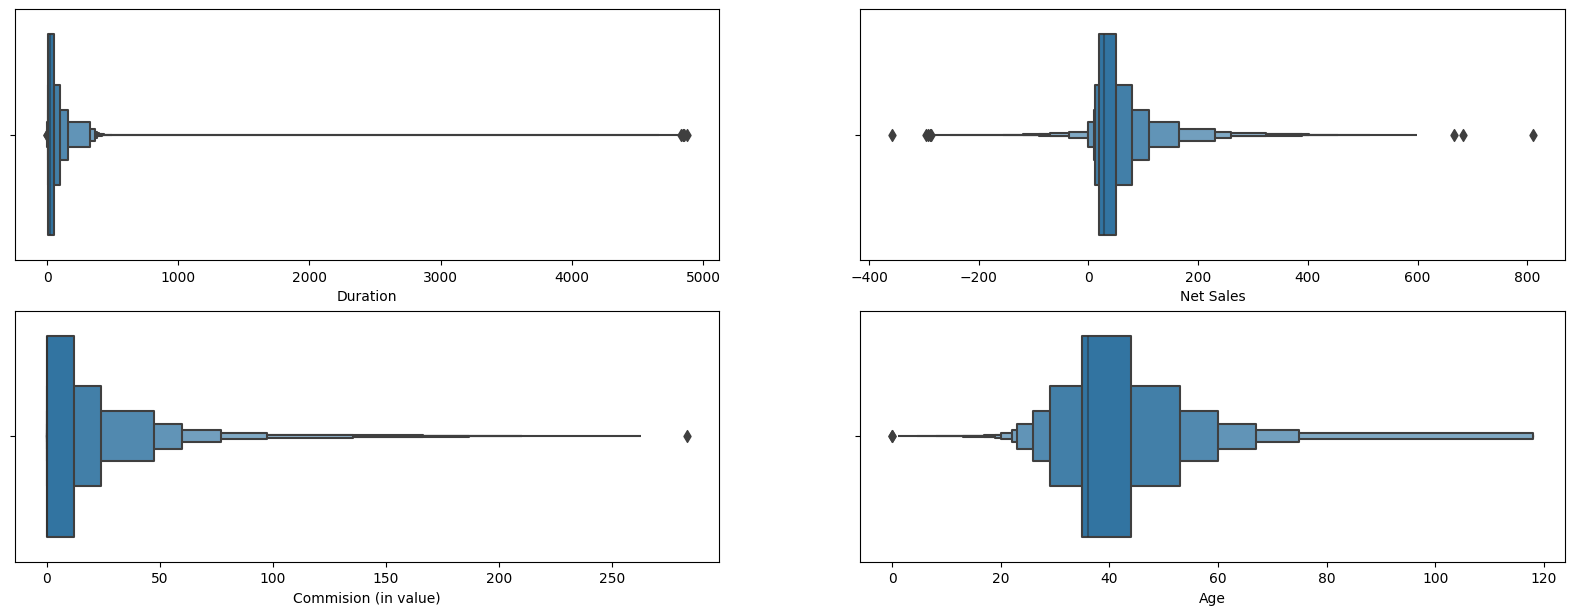

In [17]:
col_eda = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
plt_num = 1
plt.figure(figsize=(20, 15))

for col in col_eda:
    plt.subplot(4, 2, plt_num)
    sns.boxenplot(data=df, x=col)
    plt_num += 1;

Based on visualization of numerical data, we can conclude that the distribution of data is mostly not normal (right skewed) and there's and outliers in the data.

## **Data Approach with Domain Knowledge**

Let's explore the data further by identifying what's the data consist of, such as missing values, duplicated, outliers, etc. with domain knowledge approach.
First, let's start with **'Duration'** column.

Since most people would plan their travel at least 3 months before it means let's say 100 days. For travel insurance itself **most policies allow up to 90 days**. So, we can say that **more than 90 days** of duration travel. For maximum range of duration, let's say we can book a flight ticket 1 year earlier, means 365 day (incase it's a leap year). Add with Maximum of days of travel insurance covers, 90 days. Try to calculate toatal duration of travel duration:

- 365 + 90 = **455 days** 

Based on the calculation above we can assume that Insurance Company won't cover Insurance Claim more than **455 days**.

Reference:
https://www.squaremouth.com/travel-insurance-benefits/maximum-trip-length 

In [18]:
df[df['Duration'] > 455].shape

(33, 10)

Second, 'Net Sales' column. For the 'Net Sales' column, since it's possible for the Net Sales for minus-when the insurance is sold but not gain any profit or the given amount of claim is more than the actual policy amount. So, let's just clean the extreme outliers based on the visualization above before. 

In [19]:
df[df['Net Sales'] > 400].shape

(39, 10)

In [20]:
df[df['Net Sales'] < -200].shape

(17, 10)

Commision in values is amount we must give to the stakeholder, so it would be bizare if the value is 0. Since the distribution of 'Comision (in value)' is not normal (right skewed), Let's check the median and mode. 

In [21]:
df['Commision (in value)'].median()

0.0

In [22]:
df['Commision (in value)'].mode()

0    0.0
Name: Commision (in value), dtype: float64

Since the median and mode of 'Comision (in value) itself is 0, let's just clean the extreme values (outliers) in 'Commision (in values)' column based on the visualization.

In [23]:
df[df['Commision (in value)'] > 200].shape

(38, 10)

Now, let's see the **'Age'** column. For age, theres an age grouping in Insurance. From Allianz article, Range of Age for insurance devided into:
- Young Adult (18 - 30)
- Adult (30 - 60)
- Senior (60 - 75)

From other reference, there’s also Insurance that covers the age up to **99 year old**. In conclution, insurance company most likely not going to cover the insurance for age above 99 yo. Means, we need to clean the age above it.

It would be better if we categorize the age range from the data set. After that we’re gonna mapping the age class based on the categorize.  Wecan conclude that the range of age is going to be:
- Child (0 - 18)
- Young Adult (18 - 30)
- Adult (30 - 60)
- Senior (60 - 75)

References:
- https://www.allianz-assistance.com.sg/blog/How-Age-May-Impact-Your-Travel-Insurance-Needs.html 
- https://www.comparethemarket.com.au/travel-insurance/types/seniors/#:~:text=Travel%20insurance%20for%20seniors%20can,expensive%20as%20you%20get%20older 

In [24]:
df[df['Age'] > 99].shape

(423, 10)

let's try to categorize 'Age' column based on domain knowledge. We'll be using this catogorization for EDA (by showing claim based on age categorical).

In [25]:
def age_convert(age):
    result = ''
    if(age <= 18):
        result = 'Child'
    elif(age <= 30):
        result = 'Young Adult'
    elif(age <= 60):
        result = 'Adult'
    else:
        result = 'Senior'
    return result

df['Age Group'] = df['Age'].apply(age_convert)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age Group
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0,Adult
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0,Adult
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0,Young Adult
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0,Adult
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0,Young Adult


Based on data approach with domain knowledge we made, let's define the clean df for processing. 

In [26]:
df = df[~(df['Duration'] > 455)]
df = df[~(df['Net Sales'] < -200)| (df['Net Sales'] > 400)]
df = df[~(df['Commision (in value)'] > 200)]
df = df[~(df['Age'] > 99)]
df.shape

(38814, 11)

## **EDA**

In [27]:
df.describe(exclude=np.number).columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Age Group'],
      dtype='object')

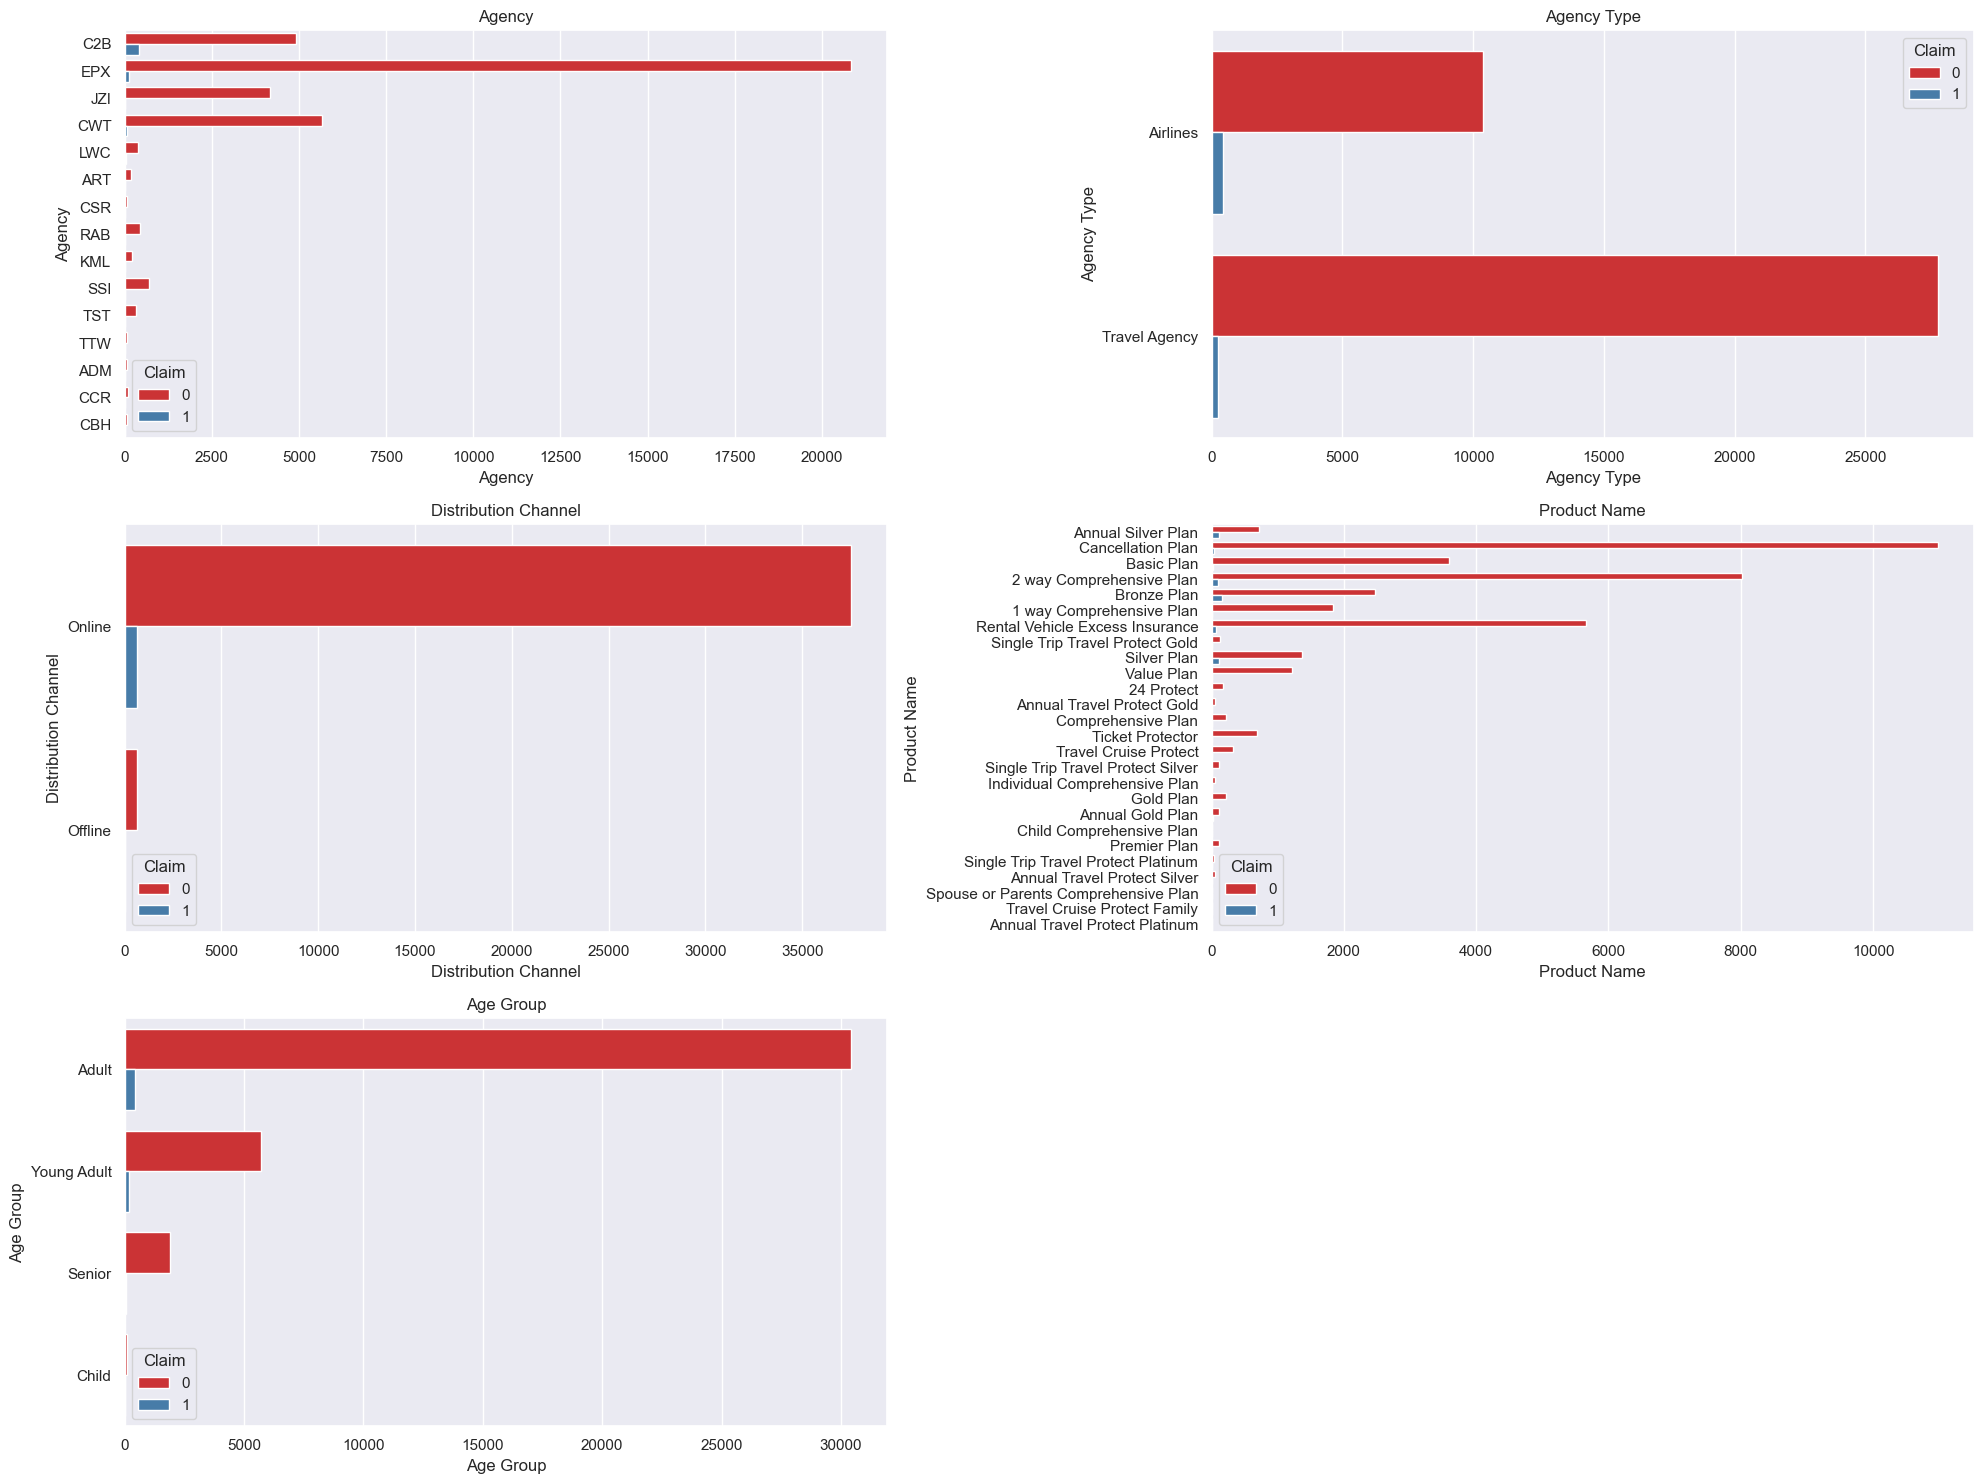

In [28]:
features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Age Group']
plt.figure(figsize=(20, 15))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(3, 2, plotnumber)
    sns.countplot(y=feature, hue='Claim', data=df)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

Text(0.5, 1.0, 'Claim by Country')

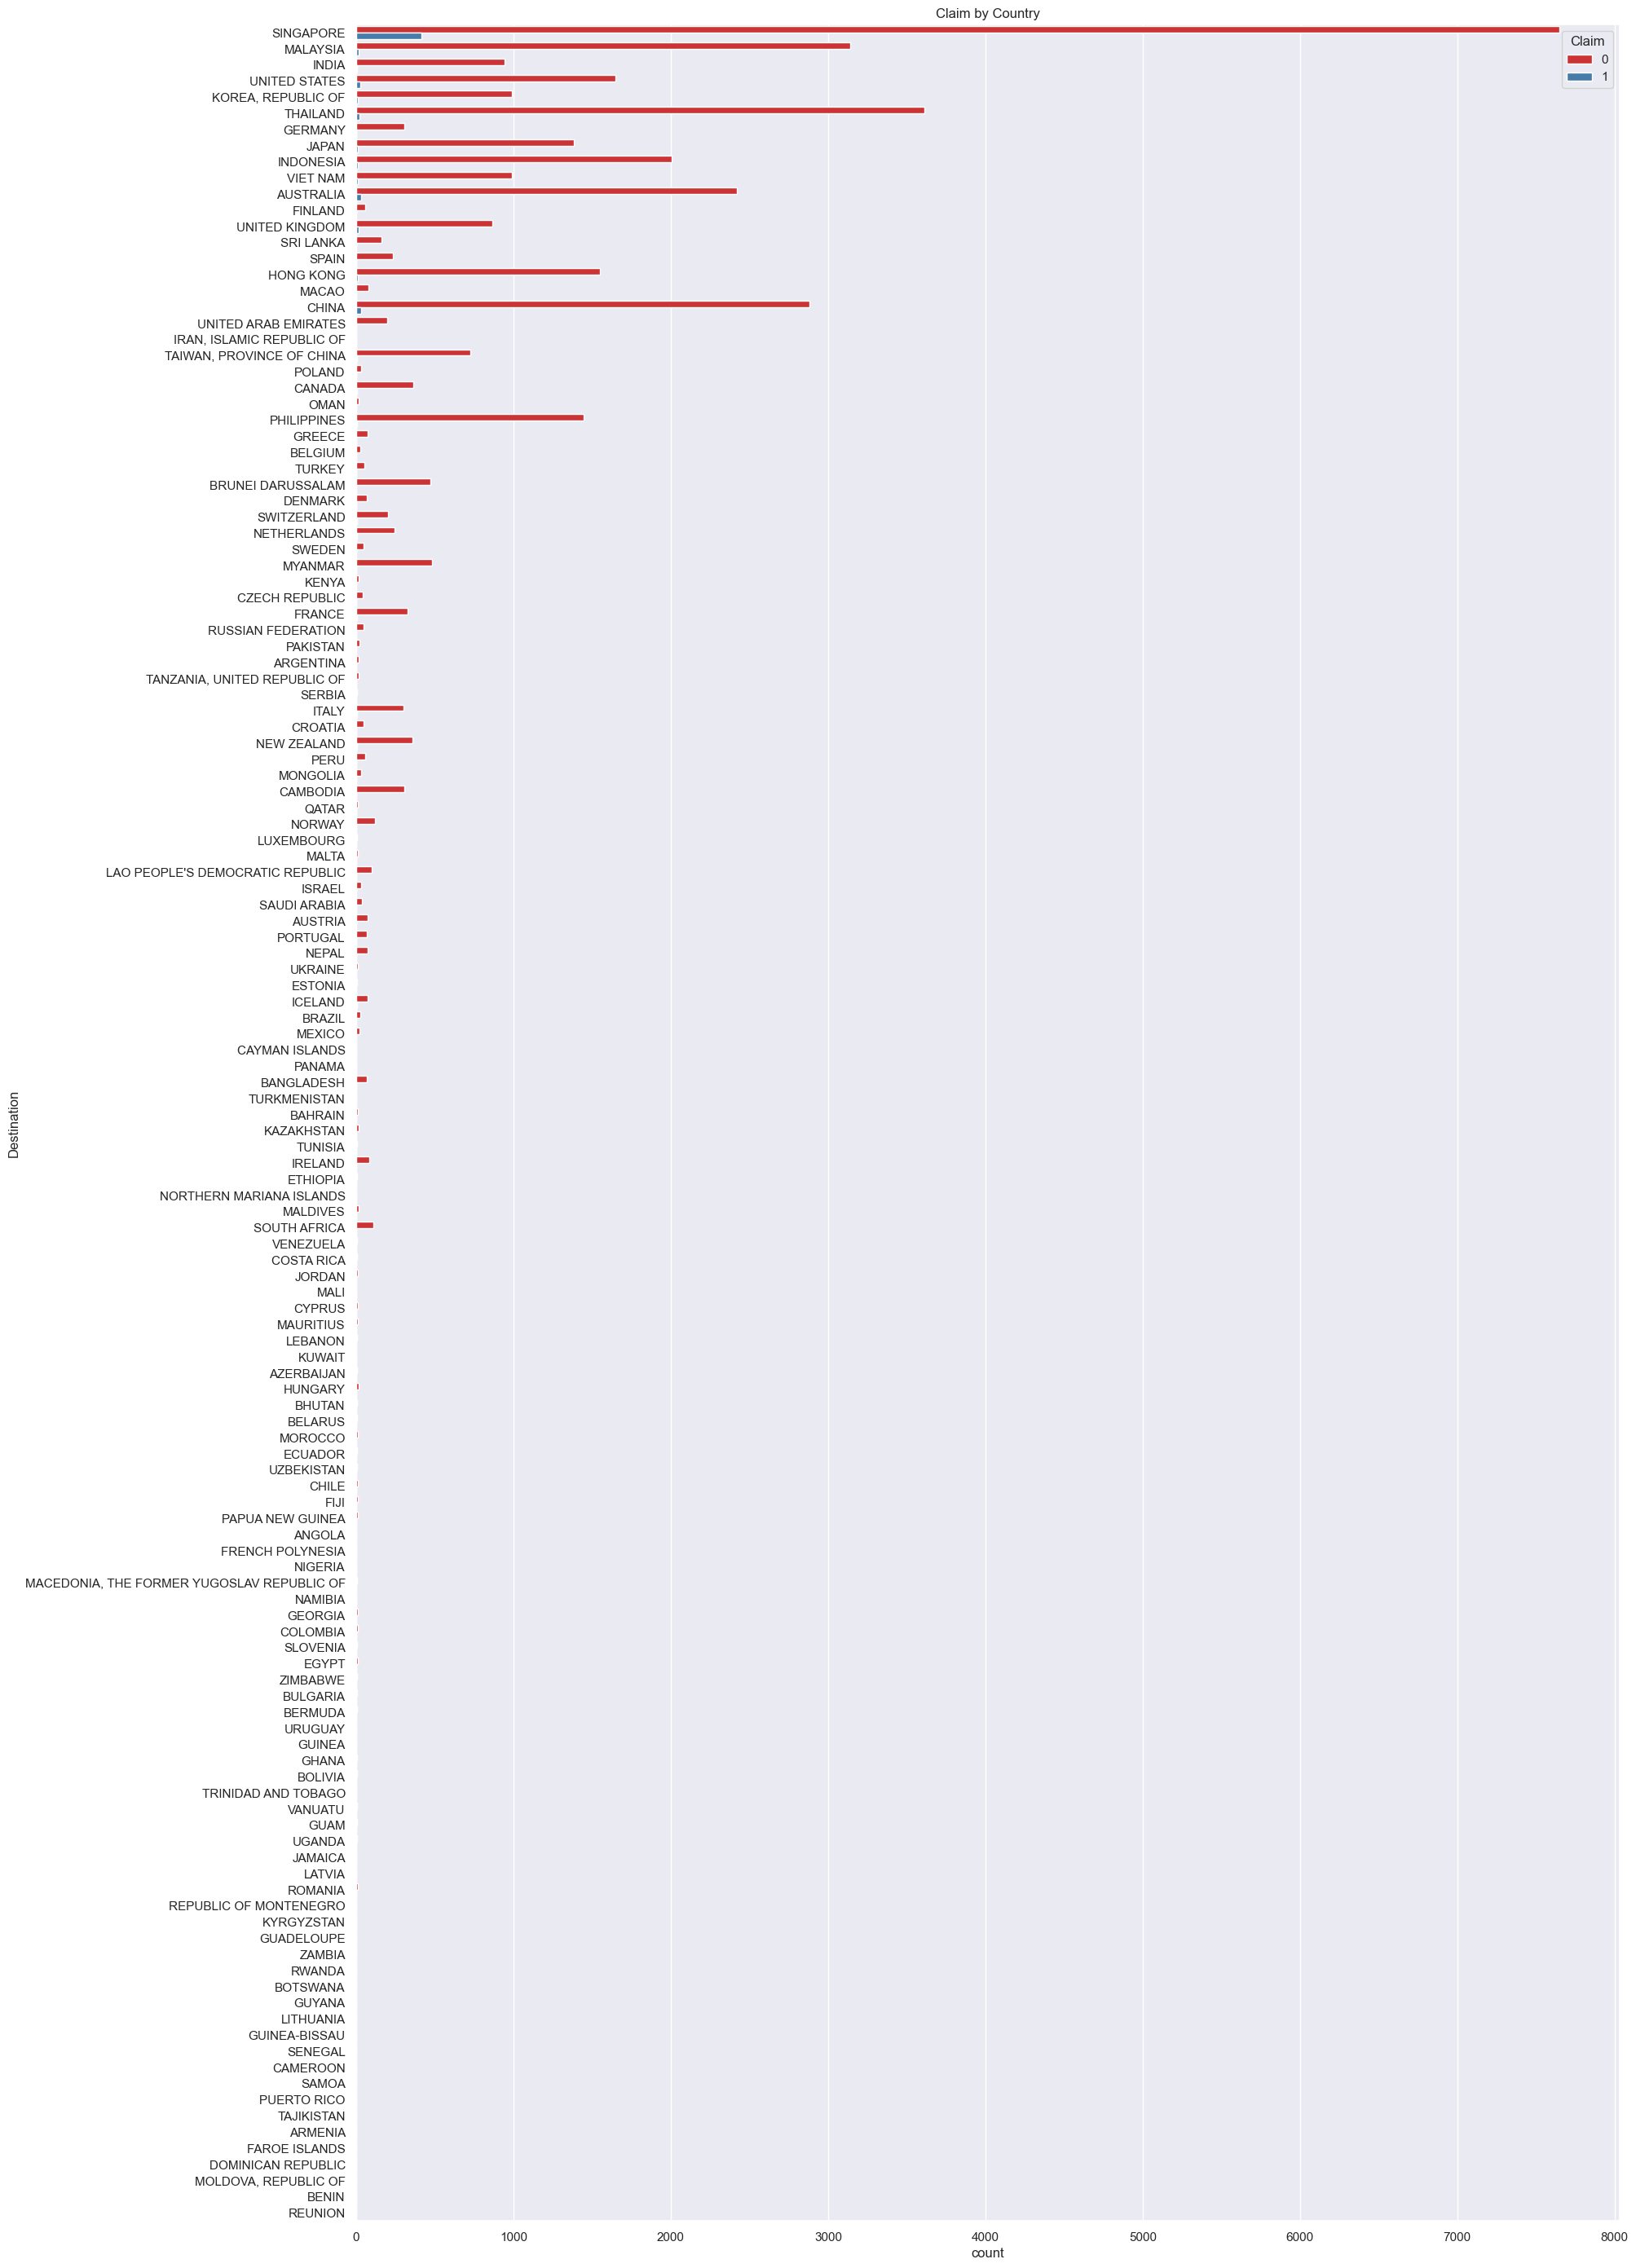

In [29]:
plt.figure(figsize=(20, 35))
sns.countplot(y='Destination', hue='Claim', data=df);
plt.title('Claim by Country')

## **Data splitting**

In [30]:
X = df.drop(columns= ['Claim', 'Age Group'])
y = df['Claim']

In [31]:
# Checking Target
print(y.value_counts())
print()
print(y.value_counts()/len(y)*100)

Claim
0    38151
1      663
Name: count, dtype: int64

Claim
0    98.291853
1     1.708147
Name: count, dtype: float64


### **Extreme Imbalance** shown in the data. With **98.3% of Not Claim (0)** and **1.7% of Claim (1)**. 

## **Data Spliting**

Splitting Data into train data and test data using train_test_split.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify= y)

## **Data Preprocessing**

Using pipeline, for applying both imputation and standardization sequentially and consistently to your dataset. To maintain consistency and ease of use when training and evaluating models, also avoiding data leakage.

In [33]:
pipe_standard = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())
])

Using Imputation to ensures machine learning models have complete data to work with, as incase had missing values and algorithms cannot handle it. SimpleImputer step helps address this by filling missing values with the median of the non-missing values for the respective features.

Standardization is a preprocessing step that scales the features so that they have a mean of 0 and a standard deviation of 1. Standardization ensures that all features are on a similar scale, preventing features with large values from dominating the learning process or features with small values being ignored.

In [34]:
transformer = ColumnTransformer([
    ('pipe_standard', pipe_standard, ['Duration', 'Net Sales', 'Commision (in value)', 'Age']),
    ('onehot', OneHotEncoder(), ['Agency Type', 'Distribution Channel']),
    ('binary', BinaryEncoder(), ['Agency','Product Name', 'Destination'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard',
                                                  StandardScaler())]),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)', 'Age']),
                                ('onehot', OneHotEncoder(),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

The ColumnTransformer helps manage preprocessing data more efficiently, allowing for a cleaner and more organized approach to data preprocessing. By applying specific transformations to different subsets of features, ensuring the data is in a suitable format for machine learning model. For example, 
- 'pipe_standard': the pipeline used for imputation and standardization on the specified numerical columns, 
- 'onehot': one-hot encoding on the specified categorical columns, 
- 'binary': binary encoding using on the specified categorical columns.

## **Model benchmark**

Since we've known the data is imbalance, we can handling it using resampling method with SMOTE, NearMiss, RandomUnderSampler, and RandomOverSampler balancing the class distribution in the dataset. Because imbalance data can lead to biased models that favor the majority class, making it harder for the model to accurately predict the minority class.

1. **SMOTE** (Synthetic Minority Over-sampling Technique): It generates synthetic samples in the minority class by considering the k-nearest neighbors of each sample and creating new instances along the line segments between neighbors.
2. **NearMiss**: Selects the majority class samples that are closest to minority class samples based on a distance metric and discards the majority class samples.
3. **Random Oversampling**: Randomly replicating minority class instances to increase their representation in the dataset.
4. **Random Undersampling**: Randomly removing majority class instances to balance the class distribution.

In [35]:
# resampling
sm = SMOTE(random_state=0)
nm = NearMiss()
under = RandomUnderSampler(random_state=0)
over = RandomOverSampler(random_state=0)

By defining and testing multiple algorithms, you can compare their performance and choose the most appropriate one for your specific task. By selecting the best model for our dataset, it improving the chances of building an accurate and reliable predictive model.

1. Logistic Regression: A binary classification algorithm that predicts the probability of an instance belonging to a certain class.
2. K-Nearest Neighbors (KNN): An instance-based algorithm that predicts the class of a new instance based on its closest neighbors in the training set.
3. Decision Trees: Algorithms that split the data based on feature values to create a tree-like structure for classification.
4. Bagging: Combines predictions from multiple models trained on different subsets of data to improve overall accuracy and robustness.
5. Random Forest: An ensemble method that builds multiple decision trees and combines their predictions for improved accuracy.
6. AdaBoost: Creates a strong learner by sequentially focusing on the misclassified samples in each iteration.
7. Gradient Boosting: Builds models sequentially, each correcting the errors of the previous one, to minimize the loss function and improve predictive accuracy.
8. XGBoost: Optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.


In [36]:
# Define Algoritms / Model used
logreg = LogisticRegression(random_state=0, C=5)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(random_state=0, max_depth=10)
bagging = BaggingClassifier(random_state=0, base_estimator=KNeighborsClassifier(n_neighbors=10))
rf = RandomForestClassifier(random_state=0, max_depth=5, min_samples_split=3, min_samples_leaf=4)
adaboost = AdaBoostClassifier(random_state=0, n_estimators=5)
gradient = GradientBoostingClassifier(random_state=0, learning_rate=0.2)
xgboost = XGBClassifier()

Now, let's try to find our best base model by using Cross Validation Score. 

Metric Scoring we use is **"Recall"**. It is used because based on bussines problem the False Negative aspec need to be minimize. Hence, we need to use Recall for minimizing the False Negative. 

In [37]:
# Model Selection
models = [logreg, knn, tree, bagging, rf, adaboost, gradient, xgboost]

cv_mean = []
cv_std = []
cv_all = []

# Mencari model terbaik berdasarkan recall score terbesar dan std terkecil
for i in models:

    model_pipe = Pipeline([
        ('transformer', transformer),
        ('model', i)])
    
    model_cv = cross_val_score(
        estimator=model_pipe, 
        X= X_train, 
        y= y_train, 
        cv = 5, 
        scoring= 'recall',
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [38]:
df_cv = pd.DataFrame({
    'model': models,
    'mean': cv_mean,
    'std': cv_std
})

df_cv.sort_values('mean', ascending=False)

,model,mean,std
2,"DecisionTreeClassifier(max_depth=10, random_state=0)",0.009434,0.005967
7,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=None, ...)",0.007547,0.007060
1,KNeighborsClassifier(),0.005660,0.007547
6,"GradientBoostingClassifier(learning_rate=0.2, random_state=0)",0.005660,0.007547
3,"BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),\n random_state=0)",0.001887,0.003774
0,"LogisticRegression(C=5, random_state=0)",0.000000,0.000000
4,"RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=3,\n random_state=0)",0.000000,0.000000
5,"AdaBoostClassifier(n_estimators=5, random_state=0)",0.000000,0.000000


Based on the Cross Validation Score, we've got our Best 2 Model of model benchmark, it is **DecisionTreeClassifier** and **XGBClassifier**.
Let's try to tuning the 2 models.

## **Hyperparameter Tuning**

Based on Cross Validation Score our one of best model is DecisionTreeClassifier.

**DecisionTreeClassifier** itself is a class capable of performing multi-class classification on a dataset. The dataset is recursively split into branches until subsets are pure or meet stopping criteria.

- Max Depth (max_depth): Limits the maximum depth of the decision tree, controlling overfitting.
- Minimum Samples per Leaf (min_samples_leaf): Sets the minimum number of samples required in a leaf, preventing small leaves.
- Criterion: Chooses the function to measure the quality of a split, such as Gini impurity or entropy.
- Splitter: Defines the strategy to choose the split at each node, like best or random.

In [39]:
# Hyperparameter Tuning for DecisionTreeClassifier
param = {
    'modeling__criterion': ['gini', 'entropy'],
    'modeling__max_depth': list(range(4, 20, 2)),       
    'modeling__min_samples_split': list(range(3, 10, 2)),                   
    'modeling__min_samples_leaf': list(range(2, 12, 2)),
    'resample': [sm, nm, over, under, None]
}

Pipe_model = Pipeline([
        ('transformer', transformer),
        ('resample', sm),
        ('modeling', tree)
    ])
# Define Grid 
gridsearch = GridSearchCV(
                estimator= Pipe_model,
                param_grid=param,
                cv=5,
                scoring='recall',
                n_jobs=-1
            )

In [40]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_standard',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard',
                                                                                          StandardScaler())]),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel'])...
                                        DecisionTreeClassifier(max_depth=10,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__criterion': ['gini', 'entropy'],
                         'modeling__max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'modeling__min_samples_leaf': [2, 4, 6, 8, 10],
                         'modeling__min_samples_split': [3, 5, 7, 9],
                         'resample': [SMOTE(random_state=0), NearMiss(),
                                      RandomOverSampler(random_state=0),
                                      RandomUnderSampler(random_state=0),
                                      None]},
             scoring='recall')

In [41]:
pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__criterion,param_modeling__max_depth,param_modeling__min_samples_leaf,param_modeling__min_samples_split,param_resample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
704,0.240679,0.013351,0.025724,0.006124,gini,18,2,3,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 3, 'resample': None}",0.018868,0.028302,0.009434,0.009434,0.075472,0.028302,0.024601,1
604,0.219677,0.008889,0.022617,0.007226,gini,16,2,3,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 16, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 3, 'resample': None}",0.009434,0.018868,0.009434,0.009434,0.075472,0.024528,0.025732,2
709,0.248743,0.022257,0.019964,0.002442,gini,18,2,5,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 5, 'resample': None}",0.000000,0.028302,0.009434,0.018868,0.066038,0.024528,0.022798,2
614,0.237637,0.010973,0.019386,0.002290,gini,16,2,7,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 16, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 7, 'resample': None}",0.000000,0.009434,0.018868,0.018868,0.075472,0.024528,0.026415,2
734,0.227655,0.014479,0.030292,0.004479,gini,18,4,7,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 4, 'modeling__min_samples_split': 7, 'resample': None}",0.000000,0.009434,0.018868,0.037736,0.047170,0.022642,0.017497,5


In [42]:
print('DecisionTreeClassifier')
print('Best_score:', gridsearch.best_score_)
print('Best_params:', gridsearch.best_params_)

DecisionTreeClassifier
Best_score: 0.02830188679245283
Best_params: {'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 3, 'resample': None}


**XGBoost** is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.

- n_estimators: The number of boosting rounds or trees to build.
- max_depth: The maximum depth of each decision tree.
- learning_rate: The step size shrinkage used to prevent overfitting.
- Gamma (gamma): Minimum loss reduction to make a split. The higher the value, the more conservative the algorithm will be. It acts as a regularization term for the tree, controlling its depth.

In [43]:
# Hyperparam space XGboost
param_xgboost = {
    'model__max_depth': [3, 5, 7], 
    'model__learning_rate': [0.05, 0.1, 0.2] ,
    'model__n_estimators': [100, 150, 200],
    'model__gamma':[1, 5, 10] ,
    'resample': [sm, nm, over, under, None]
}
Pipe_model = Pipeline([
        ('transformer', transformer),
        ('resample', sm),
        ('modeling', xgboost)
    ])
# Define Grid 
grid_xg = GridSearchCV(
                estimator= Pipe_model,
                param_grid=param,
                cv=5,
                scoring='recall',
                n_jobs=-1
            )

In [44]:
grid_xg.fit(X_train, y_train)

[10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

[10:08:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_standard',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard',
                                                                                          StandardScaler())]),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel'])...
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'modeling__criterion': ['gini', 'entropy'],
                         'modeling__max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'modeling__min_samples_leaf': [2, 4, 6, 8, 10],
                         'modeling__min_samples_split': [3, 5, 7, 9],
                         'resample': [SMOTE(random_state=0), NearMiss(),
                                      RandomOverSampler(random_state=0),
                                      RandomUnderSampler(random_state=0),
                                      None]},
             scoring='recall')

In [47]:
pd.DataFrame(grid_xg.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__criterion,param_modeling__max_depth,param_modeling__min_samples_leaf,param_modeling__min_samples_split,param_resample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
799,15.707520,0.085137,0.153819,0.019042,gini,18,10,9,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 10, 'modeling__min_samples_split': 9, 'resample': None}",0.018868,0.009434,0.0,0.028302,0.028302,0.016981,0.011002,1
789,16.175694,0.456374,0.147307,0.011258,gini,18,10,5,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 10, 'modeling__min_samples_split': 5, 'resample': None}",0.018868,0.009434,0.0,0.028302,0.028302,0.016981,0.011002,1
784,16.742484,0.255065,0.148623,0.007018,gini,18,10,3,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 10, 'modeling__min_samples_split': 3, 'resample': None}",0.018868,0.009434,0.0,0.028302,0.028302,0.016981,0.011002,1
779,16.306071,0.200279,0.159246,0.013028,gini,18,8,9,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 8, 'modeling__min_samples_split': 9, 'resample': None}",0.018868,0.009434,0.0,0.028302,0.028302,0.016981,0.011002,1
774,16.928614,0.306586,0.153927,0.009427,gini,18,8,7,None,"{'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 8, 'modeling__min_samples_split': 7, 'resample': None}",0.018868,0.009434,0.0,0.028302,0.028302,0.016981,0.011002,1


In [48]:
print('XGBoost')
print('Best_score:', grid_xg.best_score_)
print('Best_params:', grid_xg.best_params_)

XGBoost
Best_score: 0.0169811320754717
Best_params: {'modeling__criterion': 'gini', 'modeling__max_depth': 18, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 3, 'resample': None}


Comparing 2 best model (Decision Tree Classifier and XGboost) mean score.

In [132]:
print(df_cv['mean'].values[2], 'Decision Tree Boost Benchmark')
print(gridsearch.best_score_, 'Decision Tree Tuning')
print()

print(df_cv['mean'].values[7], 'XGBoost Benchmark')
print(grid_xg.best_score_, 'XGBoost Tuning')


0.009433962264150943 Decision Tree Boost Benchmark
0.02830188679245283 Decision Tree Tuning

0.007547169811320755 XGBoost Benchmark
0.0169811320754717 XGBoost Tuning


Based on this, we can see that there's improvement after tuning the model. This can help us to select the best model we used for our modeling. Based on this, DecisionTreeClassifier has a great improvement from **0.0094** to **0.0283**. Hence, let's use **DecisionTree** as our base model.

## **Performance in Test Set**

Finding best model with the best possible settings, using best model that already tuned for ideal modeling.

#### **a. Before Tuning**

In [46]:
# Modeling

# Model
model = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split =2, random_state=0)

# Pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(X_train, y_train)

# Predict
y_pred_tree= pipe_model.predict(X_test)

# Scoring 
print('Precision Score =', recall_score(y_test, y_pred_tree))

Precision Score = 0.0


#### **b. After Tuning**

In [50]:
# Modeling

# Model
best_model = gridsearch.best_estimator_

# fit
best_model.fit(X_train, y_train)

# Predict
y_pred_best= best_model.predict(X_test)

# Scoring 
print('Recall Score =', recall_score(y_test, y_pred_best))

Recall Score = 0.022556390977443608


In [51]:
print('Recall Score BEFORE Tuning =', recall_score(y_test, y_pred_tree))
print('Recall Score AFTER Tuning =', recall_score(y_test, y_pred_best))

Recall Score BEFORE Tuning = 0.0
Recall Score AFTER Tuning = 0.022556390977443608


Let's take a look at the Classification Report from Model Before and After Tuning.

In [52]:
from sklearn.metrics import confusion_matrix, classification_report 

In [53]:
print('Decision Tree BEFORE Tuning')
print(classification_report(y_test, y_pred_tree))

print('Decision Tree AFTER Tuning')
print(classification_report(y_test, y_pred_best))

Decision Tree BEFORE Tuning
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7630
           1       0.00      0.00      0.00       133

    accuracy                           0.98      7763
   macro avg       0.49      0.50      0.50      7763
weighted avg       0.97      0.98      0.97      7763

Decision Tree AFTER Tuning
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7630
           1       0.07      0.02      0.03       133

    accuracy                           0.98      7763
   macro avg       0.53      0.51      0.51      7763
weighted avg       0.97      0.98      0.97      7763



## **Maximize Threshold**

Maximizing the threshold in the context involves setting a higher threshold  to determine predicting the positive class (class 1/Claim).

Predicts the probabilities and class labels for the test data using the trained model. The threshold of 0.50 is used to determine the class labels from probabilities.

In [61]:
# Modeling

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth= 18, min_samples_leaf= 2, min_samples_split= 3)

# Pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(X_train, y_train)

# Predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]  # Prediction results in the form of probabilities
y_pred_class = np.where(y_pred_proba > 0.50, 1, 0) 

In [62]:
recall_score(y_test, y_pred_class)

0.015037593984962405

The recall score of approximately 0.015 (or 1.5%) means that the model correctly identified about **1.5%** of the actual positive cases (cases where is 1/ Insurence Claim).

Now, let's find the best threshold using looping.

In [63]:
# Modeling

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth= 18, min_samples_leaf= 2, min_samples_split= 3)

# Pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(X_train, y_train)

list_threshold = np.arange(0.01, 1.00, 0.01)
list_pres = []

for threshold in list_threshold:

    # Predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # Prediction results in the form of probabilities
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # those with probabilities above the threshold go into class 1

    # Recall Score
    list_pres.append(recall_score(y_test, y_pred_class)) 

In [84]:
df_th = pd.DataFrame()
df_th['Threshold'] = list_threshold
df_th['Recall'] = list_pres

df_th.sort_values('Recall', ascending=False)

,Threshold,Recall
0,0.01,0.203008
1,0.02,0.187970
2,0.03,0.172932
3,0.04,0.172932
4,0.05,0.165414
...,...,...
68,0.69,0.015038
69,0.70,0.015038
70,0.71,0.015038
71,0.72,0.015038


From dataframe above, we found that the best threshold is **0.01** with recall score **0.203008**. 

Let's try it again with using the best threshold to the model.

In [65]:
# Modeling

# Model
model = DecisionTreeClassifier(criterion='gini', max_depth= 18, min_samples_leaf= 2, min_samples_split= 3)

# Pipeline
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', model)
])

# Fit
pipe_model.fit(X_train, y_train)

# Predict
best_threshold = 0.01

y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]                # Prediction results in the form of probabilities
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # those with probabilities above the threshold go into class 1

# Recall Score
recall_score(y_test, y_pred_optimized)

0.21052631578947367

The recall score of approximately 0.21 (or 21%) means that the model correctly identified about **21%** of the actual positive cases (cases where is 1/ Insurence Claim).

In [90]:
print('Recall Before Threshold', recall_score(y_test, y_pred_class))
print('Recall After Threshold', recall_score(y_test, y_pred_optimized))

Recall Before Threshold 0.015037593984962405
Recall After Threshold 0.21052631578947367


In [91]:
print(classification_report(y_test, y_pred_class))
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7630
           1       0.08      0.02      0.03       133

    accuracy                           0.98      7763
   macro avg       0.53      0.51      0.51      7763
weighted avg       0.97      0.98      0.97      7763

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7630
           1       0.05      0.21      0.09       133

    accuracy                           0.92      7763
   macro avg       0.52      0.57      0.52      7763
weighted avg       0.97      0.92      0.94      7763



In summary, the optimized model has a higher precision, recall, and F1-score for class 1, indicating improved accuracy in predicting class 1 instances.

Comparing the Classification Report of all model.

In [86]:
print('Decision Tree BEFORE Tuning')
print(classification_report(y_test, y_pred_tree))

print('Decision Tree AFTER Tuning')
print(classification_report(y_test, y_pred_best))

print('Decision Tree After THRESHOLD')
print(classification_report(y_test, y_pred_optimized))

Decision Tree BEFORE Tuning
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7630
           1       0.00      0.00      0.00       133

    accuracy                           0.98      7763
   macro avg       0.49      0.50      0.50      7763
weighted avg       0.97      0.98      0.97      7763

Decision Tree AFTER Tuning
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7630
           1       0.07      0.02      0.03       133

    accuracy                           0.98      7763
   macro avg       0.53      0.51      0.51      7763
weighted avg       0.97      0.98      0.97      7763

Decision Tree After THRESHOLD
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7630
           1       0.05      0.21      0.09       133

    accuracy                           0.92      7763
   macro avg       0.52      0.57      0.52

From the classification report of the model's performance, the scores are **Biased** to **0 class** (Insurance **Not Claim**). However, **Recall** score is Slightly **improved** for class 1 throughout the end especially after optimizing **Threshold** compared to the "BEFORE Tuning" and "AFTER Tuning" indicating that the model is capturing more instances of class 1 after threshold optimization. In summary, the model performance improved slightly after tuning and further improved after optimizing the threshold, particularly in terms of capturing instances of class 1 (Insurance Claims).

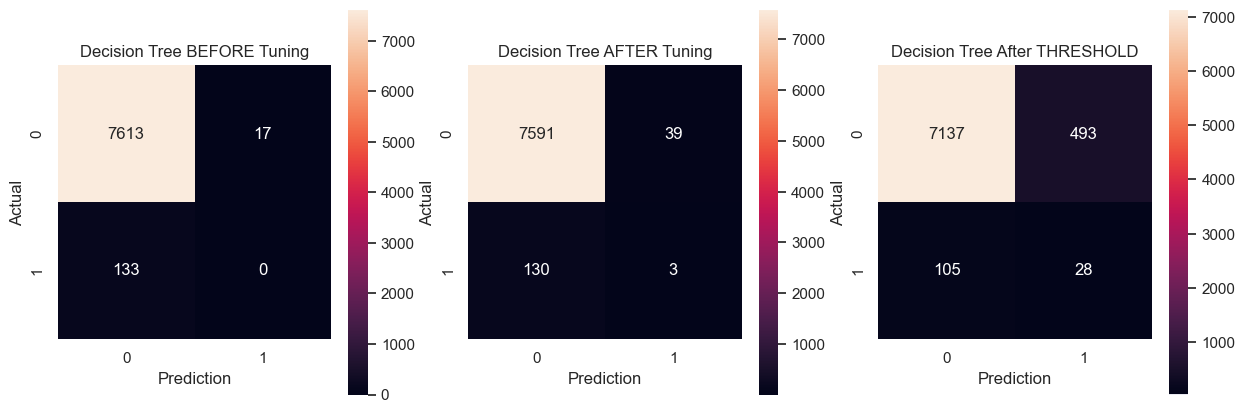

In [87]:
plt.figure(figsize=(15,5))

# Model Decision Tree before tuning
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Decision Tree BEFORE Tuning')

# Model XGBoost after tuning
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Decision Tree AFTER Tuning');

# Model XGBoost after tuning
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Decision Tree After THRESHOLD');

The values you see are confusion matrices, a tabular representation of a classification model's performance. In a binary classification problem like this one, the confusion matrix has four entries:

1. True Positives (TP): The model correctly predicted positive outcomes (in this case, the presence of an insurance claim).
2. True Negatives (TN): The model correctly predicted negative outcomes (no insurance claim).
3. False Positives (FP): The model predicted positive outcomes incorrectly (predicted an insurance claim, but there wasn't).
4. False Negatives (FN): The model predicted negative outcomes incorrectly (predicted no insurance claim, but there was).


### Based on the visualization above, we can see that there's improvement in **Minimizing the False Negative of Claim.** 

In [59]:
print('Claim on Data Train')
print(y_train.value_counts())
print()
print(y_train.value_counts()/len(y_train)*100)
print()
print()
print('Claim on Data Test')
print(y_test.value_counts())
print()
print(y_test.value_counts()/len(y_test)*100)

Claim on Data Train
Claim
0    30521
1      530
Name: count, dtype: int64

Claim
0    98.293131
1     1.706869
Name: count, dtype: float64


Claim on Data Test
Claim
0    7630
1     133
Name: count, dtype: int64

Claim
0    98.286745
1     1.713255
Name: count, dtype: float64


## **Business Summary**

The Purpouse of this project is to predicted weather a customer will Claim or Not Claim the travel Insurence. Based on the bussiness problem we've define above;

**1. False Negative**
<br>
When Customer Predicted Not Claim but in actually Claimed with case **"Cancel for Any Reason"**. Company must pay the Policy Amount of Deposit and Additional Cost at **$ 1,400** 

**2. False Positive**
<br>
Where Customer predicted Claim but Not Claim. Company must give the Policy Amount only for the Insurance Coverage without Deposit at **$ 400** 

### **Before Using Machine Learning**
<br>

Before using Machine Learning, company doesn't know who's gonna make a Claim with "Cancel for Any Reason". Therefore, company predicted the claim cost in a same amount of **$1,400**. We can made an assumption of Claim Cost like;

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 0             | 7630          |
| Actual (1)      | 0             | 133           |

- Cost Claim Customers 7763 * 1400 = **$ 10,868,200**
- Claim on Target 133 * 1400 = **$ 186,200**

- Total Unnecessary Cost 10.868.200 - 186.200 = **$ 10,682,000**

### **After Using Machine Learning**
<br>

After utilizing Machine Learning, the company can predict the target (in this case, customers who are likely to claim or not claim) more accurately. This enables the company to allocate costs more precisely.
<br>

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 7591          | 39            |
| Actual (1)      | 133           | 3             |

- **Predicted cost** for customers who actually did **Not Claim** = 39 * 400 = **$ 15,600**
- **Predicted cost** for customers who actually **Claimed** = 130 * 1,400 = **$ 182,000**

- Hence, the **Total Potential Loss** the company could face is 15,600 + 182,000 = **$ 197,000**

### **Company Potential Cost Loss After Machine Learning**
<br>
After comparison based on calculation we made above, we can compare the probability of company loss. Predicted loss made stated; 

- Predicted company loss before using Machine Learning = **$ 10,682,000**
- Predicted company loss after using Machine Learning = **197,000**

By using Machine Learnig company can avoid loosing uncessesary amount of potential loss made by unprecise targeting on Claim Travel Insurance.

## **Data Summary**

Recall Score metric used because minimizing False Negatives is more important than minimizing False Positives. This helps us accurately predict the instances where customers will Claim Insurance (1) or Not Claim (0).

DecisionTreeClassifier

   - Train Set:
      - Before tuning: 0.0094
      - After tuning: 0.028
<br>
<br>

   - Test Set:
      - Before tuning: 0.0
      - After tuning: 0.023

Hyperparameter tuning succsessfully increased the Recall Score in the test set for the DecisionTreeClassifier model by 0.023. However, the model's overall performance is still not satisfactory due to an extreme data imbalance:
- Not Claim (0)    **98.3%**
- Claim (1)         **1.7%**

Although there have been efforts to handle imbalanced data (including using SMOTE, NearMiss, RandomOverSample, and RandomUnderSample as resamplers during hyperparameter tuning), it is observed that they still cannot handle this extremely imbalanced data. This results in poor performance of the model

However, since the number of class 1 is only about 1% of the total data, using resampling techniques alone is not enough to produce an optimal model performance. Other approaches need to be tried, such as combining it with feature engineering that can be done in the next remodeling.


## **Business Suggestions**

**1. Utilize Machine Learning for Predictions:**

Implement machine learning models to predict whether a customer is likely to claim or not claim the travel insurance. This will enable the company to make more accurate predictions and allocate costs accordingly.

**2. Cost Allocation Precision:**

After implementing machine learning, the company can allocate costs more precisely based on the predictions. This enables the company to tailor its cost allocation strategy, distinguishing between customers likely to claim and those not likely to claim, reducing unnecessary financial burdens.

**3. Risk Mitigation Strategies:**

Develop strategies to mitigate risks associated with potential losses. This could include revising insurance policy terms, adjusting premiums, or exploring reinsurance options to manage financial exposure effectively.

**4. Education and Awareness:**

Educate the company stakeholders, including decision-makers and employees, about the benefits of using machine learning for predictive analytics. Foster a culture that embraces data-driven decision-making for improved business outcomes.

**5. Regular Model Evaluation and Refinement:**

Continuously monitor and evaluate the performance of the machine learning model. As the business landscape evolves, update the model and its parameters to ensure it remains effective in predicting customer behavior and potential claims accurately.

## **Data Driven Suggestions**

**1. Collect More Data for the Minority Class:**

If feasible, aim to collect more data for the minority class (Claim in this case). A larger dataset for the minority class can help in training a more robust model.

**2. Addressing Data Imbalance:**

The extreme data imbalance, where **"Not Claim" (0)** constitutes **98.3%** and **"Claim" (1)** is only **1.7%**, is a significant challenge. The efforts to handle this imbalance through techniques like SMOTE, NearMiss, RandomOverSampler, and RandomUnderSampler during hyperparameter tuning are recognized. However, these efforts were insufficient to effectively handle the extreme data imbalance.

**3. Combining Techniques:**

Given that the number of class 1 instances is only around 1% of the total data, it's clear that using resampling techniques alone is not adequate. It's advised to explore combining resampling techniques with advanced feature engineering to improve the model's performance. Feature engineering can help extract more meaningful information from the dataset and potentially enhance the model's ability to identify true positives.

**4. Continuous Model Refinement:**

The conclusion emphasizes the importance of iterative refinement. It's crucial to continue refining the model, considering alternative approaches, and incorporating new techniques based on the lessons learned from the current analysis. This iterative approach will likely lead to a more effective predictive model for identifying insurance claims accurately.

**5. Regular Monitoring and Feedback Loop:**

Establish a process to regularly monitor the model's performance, gather feedback from end-users or domain experts, and iterate on the model to continuously improve its predictions.


## **Feature Importance**

Let's try to see the most important feature in this model. It's a step for determining better model by features selection based on most important features in the future.

In [70]:
best_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_standard',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('resample', None),
                ('modeling',
                 DecisionTreeClassifier(max_depth=18, min_samples_leaf=2,
                                        min_samples_split=3, random_state=0))])

In [71]:
best_model['modeling'].feature_importances_

array([2.92193419e-01, 1.51522451e-01, 1.20748708e-01, 2.87800280e-01,
       1.46548100e-04, 5.76795335e-04, 6.49568976e-03, 0.00000000e+00,
       6.46234926e-04, 6.17379853e-02, 0.00000000e+00, 8.85034987e-04,
       0.00000000e+00, 6.48889937e-03, 5.35848456e-03, 6.53145224e-03,
       1.31759591e-02, 0.00000000e+00, 3.83275796e-04, 4.42876208e-03,
       1.56954887e-02, 6.32035425e-03, 5.36719566e-03, 6.95345667e-03,
       6.54352472e-03])

In [72]:
best_model['transformer'].transformers_[0][2]

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [76]:
list(best_model['transformer'].transformers_[1][1].get_feature_names_out())

['Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Distribution Channel_Offline',
 'Distribution Channel_Online']

In [73]:
list(best_model['transformer'].transformers_[2][1].get_feature_names_out())

['Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7']

In [75]:
feature_1 = best_model['transformer'].transformers_[0][2]
feature_2 = list(best_model['transformer'].transformers_[1][1].get_feature_names_out())
feature_3 = list(best_model['transformer'].transformers_[2][1].get_feature_names_out())

feat = feature_1 + feature_2 + feature_3  
feat

['Duration',
 'Net Sales',
 'Commision (in value)',
 'Age',
 'Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Distribution Channel_Offline',
 'Distribution Channel_Online',
 'Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Destination_7']

In [77]:
feat_important = pd.DataFrame({
    'Feature':feat,
    'Importance':best_model['modeling'].feature_importances_
}).sort_values('Importance', ascending=False)

feat_important

,Feature,Importance
0,Duration,0.292193
3,Age,0.287800
1,Net Sales,0.151522
2,Commision (in value),0.120749
9,Agency_1,0.061738
20,Destination_3,0.015695
16,Product Name_4,0.013176
23,Destination_6,0.006953
24,Destination_7,0.006544
15,Product Name_3,0.006531


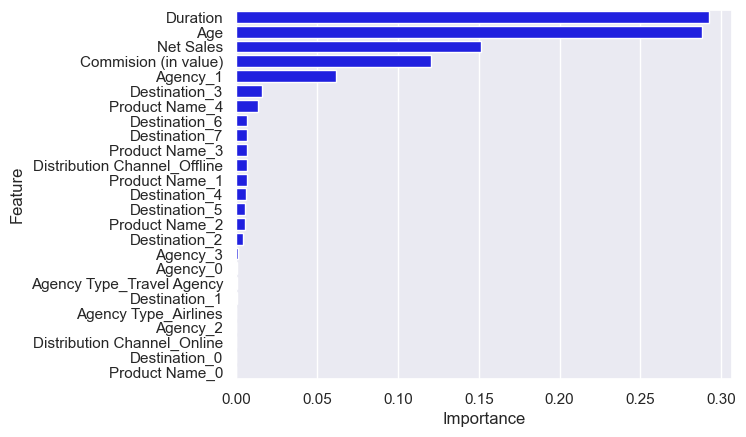

In [81]:
sns.barplot(data=feat_important, y='Feature', x='Importance', color='b');

Based on graph above, we found that **Duration, Age, Net Sales, Commision (in value), and Agency** are the best 5 features for modeling in thid dataset. In conclution, for the next modeling, we can use these best 5 features above for better model. 

## **Saving Model**

Let's save best model into **pickle**.

In [141]:
import pickle
# Model
best_model = gridsearch.best_estimator_
best_model

# fit
best_model.fit(X, y)

# save with pickle
pickle.dump(best_model, open('model_best_model.sav', 'wb'))